In [1]:
import pandas as pd
import numpy as np
import requests 
import yfinance as yf
from pandas_datareader import data as pdr
from bs4 import BeautifulSoup as bs
from alpha_vantage.timeseries import TimeSeries
import matplotlib.pyplot as plt
import seaborn

What stock would you like to use: tsla


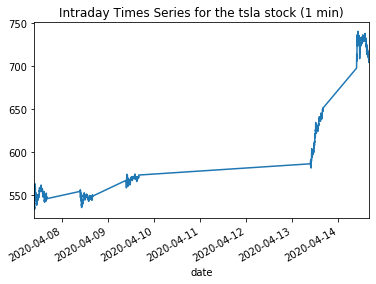

In [2]:
stock = input("What stock would you like to use: ")
ts = TimeSeries(key='YOUR_API_KEY', output_format='pandas')
data, meta_data = ts.get_intraday(symbol=stock,interval='1min', outputsize='full')
data['4. close'].plot()
plt.title('Intraday Times Series for the ' + stock + ' stock (1 min)')
plt.show()

In [6]:

msft = yf.Ticker("TSLA")

#msft.info

# Plot historical stock data

[*********************100%***********************]  1 of 1 completed
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


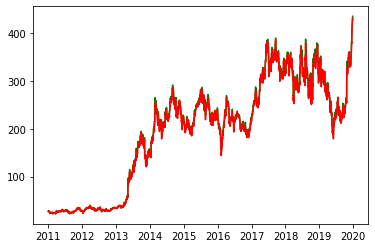

In [3]:
import yfinance as yf
yf.pdr_override() # <== that's all it takes :-)

StockName = "TSLA"#str(input("Enter the 4 letter acronym of the stock you want to track: ").upper())
# download dataframe
data = pdr.get_data_yahoo(StockName, start="2011-01-01", end="2019-12-30") # Gives historical data

# download Panel
#data = pdr.get_data_yahoo(["SPY", "IWM"], start="2017-01-01", end="2017-04-30")
print(data.columns)
opening = data["Open"]
close = data["Close"]
high = data["High"]
adjlow = data["Adj Close"]
x = list(data.index.values)
#print(x)

#data.plot.scatter(x=data.index.values, y='High', color="red")
plt.plot(x, high, color="green")
plt.plot(x, adjlow, color="red")

plt.show()

# Gather current data from the Stock Market

In [29]:
answer = "y" # Initialize answer to loop program
while answer == "y":
    stock_price = None # Initialize stock price. Positive if accurate stock ticker is entered
    while stock_price == None:
        stock_name = str(input("Enter the 4 letter acronym of the stock you want to track: ").upper()) # Request stock ticker

        ######### Parse through HTML data to prepare for readable info #############################
        stock = "https://old.nasdaq.com/symbol/"+ stock_name +"/real-time" # Generate stock link of stock requested
        website_request = requests.get(stock) # Gets the website response and code
        website_content = website_request.content # Pulls the stock content from the website
        stock_soup = bs(website_content, "html.parser") # Converts HTML/CSS using BeautifulSoup

        ################### Stock Market variables ###############################
        stock_price = stock_soup.find(id="qwidget_lastsale") # Set the stock price as a List from the class
        stock_change = stock_soup.find(id="qwidget_netchange") # Find the net change of the stock
        stock_direction = stock_soup.find(id="_updownImage") # Determine direction of stock
        stock_percent = stock_soup.find(id="qwidget_percent") # Determine direction of stock

        ################### Catch spelling errors to avoid program crash ##################
        if stock_price == None:
            print("You did not enter an accurate stock ticker. Please try again.")
        else:
            break

    ######################## Initialize list for stock market data ######################
    stock_list = []

    ############################# Add stock info to stock_list #############################
    stock_list.append({"Name": stock_name}) # Extract the name from the list as text
    stock_list.append({"Price" : stock_price.get_text()}) # Add the price of the stock to the listing
    stock_list.append({"Direction": stock_direction.get_text()}) # Add direction of stock to listing
    stock_list.append({"NetChange": stock_change.get_text()}) # Add net change points of stock to listing
    stock_list.append({"Percent": stock_percent.get_text()}) # Add percent change of stock to listing

    print(stock_list)
    answer = input("Would you like to look at another stock(y/n)?: ")

Enter the 4 letter acronym of the stock you want to track: tsla
[{'Name': 'TSLA'}, {'Price': '$510.00'}, {'Direction': '▼'}, {'NetChange': '18.16'}, {'Percent': '3.44%'}]
Would you like to look at another stock(y/n)?: n


In [4]:
test = [*range(1, 5, 1)]
print(test)

[1, 2, 3, 4]


In [5]:
stock_gain = "https://finance.yahoo.com/gainers/"
stock_request = requests.get(stock_gain)
stock_content = stock_request.content
gain_soup = bs(stock_content, "html.parser")
print(gain_soup.prettify())

<!DOCTYPE html>
<html class="NoJs featurephone" id="atomic" lang="en-US">
 <head prefix="og: http://ogp.me/ns#">
  <script>
   window.performance && window.performance.mark && window.performance.mark('PageStart');
  </script>
  <meta charset="utf-8"/>
  <title>
   Top Stock Gainers Today - Yahoo Finance
  </title>
  <meta content="Stock Screener, industry, index membership, share data, stock price, market cap, beta, sales, profitability, valuation ratios, analyst estimates, large cap value, bargain growth, preset stock screens" name="keywords"/>
  <meta content="on" http-equiv="x-dns-prefetch-control"/>
  <meta content="on" property="twitter:dnt"/>
  <meta content="90376669494" property="fb:app_id"/>
  <meta content="#400090" name="theme-color"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <meta content="See the list of the top gaining stocks today, including share price change and percentage, trading volume, intraday highs and lows, and day charts." lang=